In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_palette("GnBu_d")
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime

%matplotlib inline

In [2]:
brm = pd.read_csv("../resources/bremen.csv")
frb = pd.read_csv("../resources/freiburg.csv")

brm_hourly_driven = pd.read_csv("../generated/brm_hourly_driven.csv")
frb_hourly_driven = pd.read_csv("../generated/frb_hourly_driven.csv")

brm_hourly_weather = pd.read_csv("../generated/brm_hourly_weather.csv")
frb_hourly_weather = pd.read_csv("../generated/frb_hourly_weather.csv")


In [3]:
brm_hourly_driven["trip_duration"] = brm_hourly_driven["trip_duration"].astype(str).str.extract("days (.*?)\.")
frb_hourly_driven["trip_duration"] = frb_hourly_driven["trip_duration"].astype(str).str.extract("days (.*?)\.")

In [4]:
brm_hourly_driven

,day,hour,trip_duration
0,2019-01-20,0,00:21:00
1,2019-01-20,1,00:34:00
2,2019-01-20,2,01:51:00
3,2019-01-20,3,00:18:00
4,2019-01-20,5,01:10:00
...,...,...,...
8404,2020-01-20,19,06:24:00
8405,2020-01-20,20,05:20:00
8406,2020-01-20,21,01:47:00
8407,2020-01-20,22,02:28:00


In [5]:
brm_hourly_weather

,day,hour,precipitation,temperature
0,2019-01-20,0,0.0,-3.8
1,2019-01-20,1,0.0,-3.2
2,2019-01-20,2,0.0,-3.6
3,2019-01-20,3,0.0,-4.5
4,2019-01-20,5,0.0,-4.9
...,...,...,...,...
8404,2020-01-20,19,0.0,4.4
8405,2020-01-20,20,0.0,4.7
8406,2020-01-20,21,0.0,4.7
8407,2020-01-20,22,0.0,4.7


In [6]:
brm_hourly_weather_demand = pd.merge(brm_hourly_weather, brm_hourly_driven, on=['day', 'hour'], how='outer')
frb_hourly_weather_demand = pd.merge(frb_hourly_weather, frb_hourly_driven, on=['day', 'hour'], how='outer')

In [7]:
#frb_hourly_weather_demand["trip_duration"] = frb_hourly_weather_demand["trip_duration"].apply(pd.Timedelta).dt.total_seconds()
#brm_hourly_weather_demand["trip_duration"] = brm_hourly_weather_demand["trip_duration"].apply(pd.Timedelta).dt.total_seconds()

In [8]:
frb_hourly_weather_demand

,day,hour,precipitation,temperature,trip_duration
0,2019-05-06,14,0.0,11.2,00:07:00
1,2019-05-07,10,0.0,11.2,00:07:00
2,2019-05-07,11,0.0,12.5,00:09:00
3,2019-05-07,12,0.0,12.9,00:23:00
4,2019-05-08,9,0.0,13.2,00:03:00
...,...,...,...,...,...
5814,2020-01-20,19,0.0,3.3,11:10:00
5815,2020-01-20,20,0.0,3.2,03:27:00
5816,2020-01-20,21,0.0,3.1,03:23:00
5817,2020-01-20,22,0.0,2.6,05:38:00


In [9]:
frb_hourly_weather_demand_spring =  frb_hourly_weather_demand[(frb_hourly_weather_demand['day'] >= "2019-03-01") & (frb_hourly_weather_demand['day'] <= "2019-05-31")]

In [10]:
#split the datasets of the two cities into 4 smaller datasets respectively for the 4 seasons
#frb_hourly_weather_demand_spring =  frb_hourly_weather_demand[(frb_hourly_weather_demand['day'] >= "2019-03-01") & (frb_hourly_weather_demand['day'] <= "2019-05-31")]
frb_hourly_weather_demand_summer =  frb_hourly_weather_demand[(frb_hourly_weather_demand['day'] >= "2019-06-01") & (frb_hourly_weather_demand['day'] <= "2019-09-31")] 
#frb_hourly_weather_demand_fall   =  frb_hourly_weather_demand[(frb_hourly_weather_demand['day'] >= "2019-09-01") & (frb_hourly_weather_demand['day'] <= "2019-11-30")]
#frb_hourly_weather_demand_winter =  frb_hourly_weather_demand[(frb_hourly_weather_demand['day'] >= "2019-12-01") & (frb_hourly_weather_demand['day'] <= "2020-01-20")]

#brm_hourly_weather_demand_spring =  brm_hourly_weather_demand[(brm_hourly_weather_demand['day'] >= "2019-03-01") & (brm_hourly_weather_demand['day'] <= "2019-05-31")]
#brm_hourly_weather_demand_summer =  brm_hourly_weather_demand[(brm_hourly_weather_demand['day'] >= "2019-06-01") & (brm_hourly_weather_demand['day'] <= "2019-09-31")] 
#brm_hourly_weather_demand_fall   =  brm_hourly_weather_demand[(brm_hourly_weather_demand['day'] >= "2019-09-01") & (brm_hourly_weather_demand['day'] <= "2019-11-30")]
#brm_hourly_weather_demand_winter =  brm_hourly_weather_demand[(brm_hourly_weather_demand['day'] >= "2019-12-01") & (brm_hourly_weather_demand['day'] <= "2020-01-20")]

In [11]:
# let us define our dependent (y) and independent (x) variables for peak electricity load prediction

xp = frb_hourly_weather_demand_summer['temperature']

yp = frb_hourly_weather_demand_summer['trip_duration']

#min_H_temp, max_H_temp = xp.min(), xp.max()

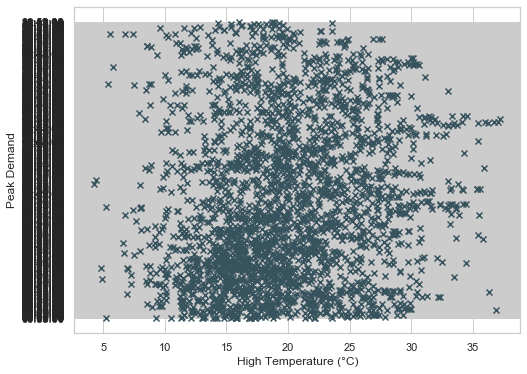

In [12]:
fig, ax = plt.subplots(figsize = (8,6))
# Plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("High Temperature (°C)")
ax.set_ylabel("Peak Demand")

plt.show()
#saving figures (You can comment-out this line inorder not to save figures)
#plt.savefig('summer data_peak demand.pdf')
 


In [13]:
brm_hourly_weather_demand

,day,hour,precipitation,temperature,trip_duration
0,2019-01-20,0,0.0,-3.8,00:21:00
1,2019-01-20,1,0.0,-3.2,00:34:00
2,2019-01-20,2,0.0,-3.6,01:51:00
3,2019-01-20,3,0.0,-4.5,00:18:00
4,2019-01-20,5,0.0,-4.9,01:10:00
...,...,...,...,...,...
8404,2020-01-20,19,0.0,4.4,06:24:00
8405,2020-01-20,20,0.0,4.7,05:20:00
8406,2020-01-20,21,0.0,4.7,01:47:00
8407,2020-01-20,22,0.0,4.7,02:28:00


In [14]:
brm_hourly_weather_demand_0 = brm_hourly_weather_demand[brm_hourly_weather_demand["hour"] == 0]
brm_hourly_weather_demand_2 = brm_hourly_weather_demand[brm_hourly_weather_demand["hour"] == 2]
brm_hourly_weather_demand_4 = brm_hourly_weather_demand[brm_hourly_weather_demand["hour"] == 4]
brm_hourly_weather_demand_6 = brm_hourly_weather_demand[brm_hourly_weather_demand["hour"] == 6]
brm_hourly_weather_demand_8 = brm_hourly_weather_demand[brm_hourly_weather_demand["hour"] == 8]
brm_hourly_weather_demand_10 = brm_hourly_weather_demand[brm_hourly_weather_demand["hour"] == 10]
brm_hourly_weather_demand_12 = brm_hourly_weather_demand[brm_hourly_weather_demand["hour"] == 12]
brm_hourly_weather_demand_14 = brm_hourly_weather_demand[brm_hourly_weather_demand["hour"] == 14]
brm_hourly_weather_demand_18 = brm_hourly_weather_demand[brm_hourly_weather_demand["hour"] == 18]
brm_hourly_weather_demand_21 = brm_hourly_weather_demand[brm_hourly_weather_demand["hour"] == 21]

In [15]:
#brm_hourly_weather_demand["trip_duration"] = brm_hourly_weather_demand["trip_duration"].apply(pd.Timedelta).dt.total_seconds()

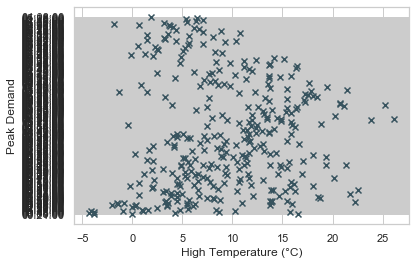

In [16]:

xp = brm_hourly_weather_demand_0['temperature']

yp = brm_hourly_weather_demand_0['trip_duration']


fig, ax = plt.subplots(figsize = (6,4))
# Plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("High Temperature (°C)")
ax.set_ylabel("Peak Demand")

plt.show()


In [17]:
brm_hourly_weather_demand_0["trip_duration"] = brm_hourly_weather_demand_0["trip_duration"].apply(pd.Timedelta).dt.total_seconds()
brm_hourly_weather_demand_0["trip_duration"] = brm_hourly_weather_demand_0["trip_duration"]/60
brm_hourly_weather_demand_0

,day,hour,precipitation,temperature,trip_duration
0,2019-01-20,0,0.0,-3.8,21.0
66,2019-01-23,0,0.0,-4.3,5.0
87,2019-01-24,0,0.0,-3.8,13.0
111,2019-01-25,0,0.0,-4.1,18.0
133,2019-01-26,0,0.1,1.6,82.0
...,...,...,...,...,...
8292,2020-01-16,0,0.0,5.5,85.0
8314,2020-01-17,0,0.0,5.4,88.0
8338,2020-01-18,0,0.0,6.5,318.0
8362,2020-01-19,0,0.0,1.9,248.0


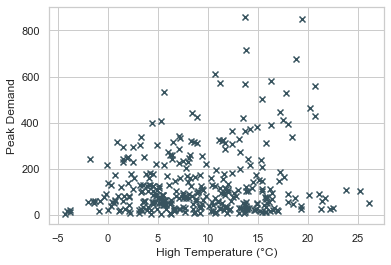

In [18]:
xp = brm_hourly_weather_demand_0['temperature']

yp = brm_hourly_weather_demand_0['trip_duration']


fig, ax = plt.subplots(figsize = (6,4))
# Plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("High Temperature (°C)")
ax.set_ylabel("Peak Demand")

plt.show()


In [19]:
brm_hourly_weather_demand_2 = brm_hourly_weather_demand[brm_hourly_weather_demand["hour"] == 2]

In [20]:
brm_hourly_weather_demand_2

,day,hour,precipitation,temperature,trip_duration
2,2019-01-20,2,0.0,-3.6,01:51:00
23,2019-01-21,2,0.0,-6.3,00:26:00
44,2019-01-22,2,0.0,-0.1,00:17:00
89,2019-01-24,2,0.0,-4.0,00:18:00
285,2019-02-02,2,0.0,-1.5,00:21:00
...,...,...,...,...,...
8294,2020-01-16,2,0.0,4.8,00:52:00
8316,2020-01-17,2,0.0,6.1,01:22:00
8340,2020-01-18,2,0.0,5.8,02:03:00
8364,2020-01-19,2,0.0,1.1,02:00:00


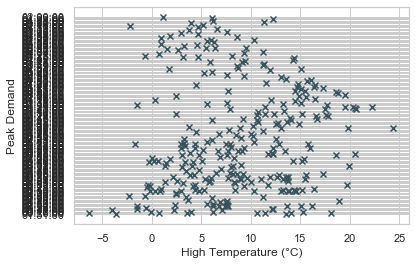

In [21]:
xp = brm_hourly_weather_demand_2['temperature']

yp = brm_hourly_weather_demand_2['trip_duration']


fig, ax = plt.subplots(figsize = (6,4))
# Plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("High Temperature (°C)")
ax.set_ylabel("Peak Demand")

plt.show()

In [22]:
brm_hourly_weather_demand_2["trip_duration"] = brm_hourly_weather_demand_2["trip_duration"].apply(pd.Timedelta).dt.total_seconds()
brm_hourly_weather_demand_2["trip_duration"] = (brm_hourly_weather_demand_2["trip_duration"])/60

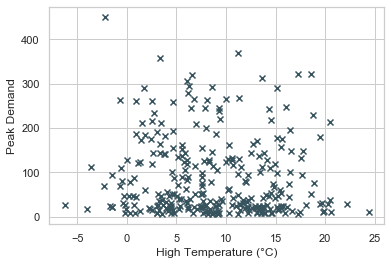

In [23]:
xp = brm_hourly_weather_demand_2['temperature']

yp = brm_hourly_weather_demand_2['trip_duration']


fig, ax = plt.subplots(figsize = (6,4))
# Plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("High Temperature (°C)")
ax.set_ylabel("Peak Demand")

plt.show()

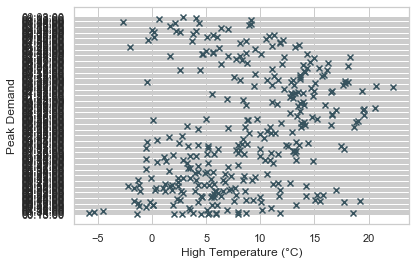

In [24]:
xp = brm_hourly_weather_demand_4['temperature']

yp = brm_hourly_weather_demand_4['trip_duration']


fig, ax = plt.subplots(figsize = (6,4))
# Plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("High Temperature (°C)")
ax.set_ylabel("Peak Demand")

plt.show()

In [25]:
brm_hourly_weather_demand_4["trip_duration"] = brm_hourly_weather_demand_4["trip_duration"].apply(pd.Timedelta).dt.total_seconds()
brm_hourly_weather_demand_4["trip_duration"] = brm_hourly_weather_demand_4["trip_duration"]/60

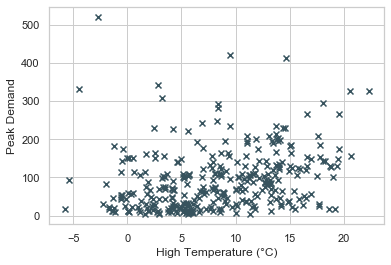

In [26]:
xp = brm_hourly_weather_demand_4['temperature']

yp = brm_hourly_weather_demand_4['trip_duration']


fig, ax = plt.subplots(figsize = (6,4))
# Plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("High Temperature (°C)")
ax.set_ylabel("Peak Demand")

plt.show()

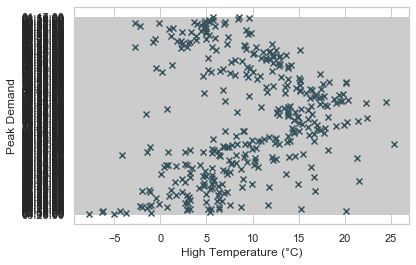

In [27]:
xp = brm_hourly_weather_demand_6['temperature']

yp = brm_hourly_weather_demand_6['trip_duration']


fig, ax = plt.subplots(figsize = (6,4))
# Plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("High Temperature (°C)")
ax.set_ylabel("Peak Demand")

plt.show()

In [28]:
brm_hourly_weather_demand_6["trip_duration"] = brm_hourly_weather_demand_6["trip_duration"].apply(pd.Timedelta).dt.total_seconds()
brm_hourly_weather_demand_6["trip_duration"] = brm_hourly_weather_demand_6["trip_duration"]/60

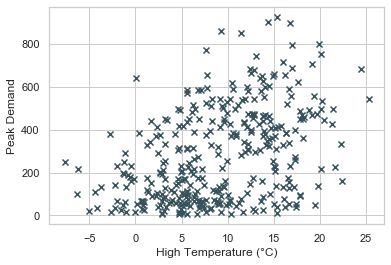

In [29]:
xp = brm_hourly_weather_demand_6['temperature']

yp = brm_hourly_weather_demand_6['trip_duration']


fig, ax = plt.subplots(figsize = (6,4))
# Plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("High Temperature (°C)")
ax.set_ylabel("Peak Demand")

plt.show()

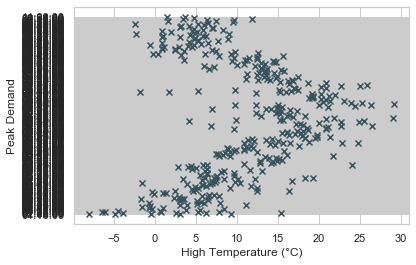

In [30]:
xp = brm_hourly_weather_demand_8['temperature']

yp = brm_hourly_weather_demand_8['trip_duration']


fig, ax = plt.subplots(figsize = (6,4))
# Plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("High Temperature (°C)")
ax.set_ylabel("Peak Demand")

plt.show()

In [31]:
brm_hourly_weather_demand_8["trip_duration"] = brm_hourly_weather_demand_8["trip_duration"].apply(pd.Timedelta).dt.total_seconds()
brm_hourly_weather_demand_8["trip_duration"] = brm_hourly_weather_demand_8["trip_duration"]/60

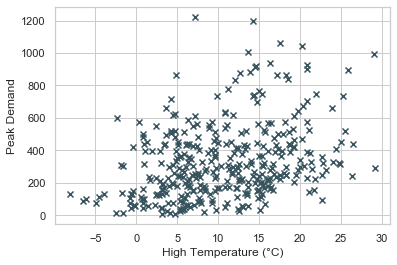

In [32]:
xp = brm_hourly_weather_demand_8['temperature']

yp = brm_hourly_weather_demand_8['trip_duration']


fig, ax = plt.subplots(figsize = (6,4))
# Plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("High Temperature (°C)")
ax.set_ylabel("Peak Demand")

plt.show()

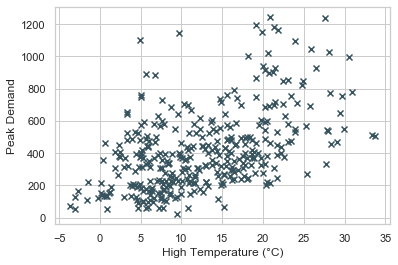

In [66]:
xp = brm_hourly_weather_demand_18['temperature']

yp = brm_hourly_weather_demand_18['trip_duration']


fig, ax = plt.subplots(figsize = (6,4))
# Plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("High Temperature (°C)")
ax.set_ylabel("Peak Demand")

plt.show()

In [34]:
brm_hourly_weather_demand_18["trip_duration"] = brm_hourly_weather_demand_18["trip_duration"].apply(pd.Timedelta).dt.total_seconds()
brm_hourly_weather_demand_18["trip_duration"] = brm_hourly_weather_demand_18["trip_duration"]/60

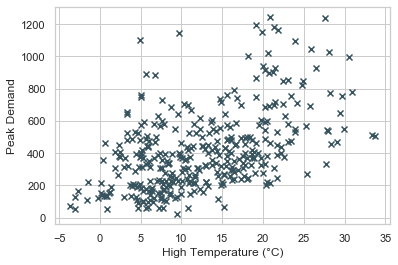

In [65]:
xp = brm_hourly_weather_demand_18['temperature']

yp = brm_hourly_weather_demand_18['trip_duration']


fig, ax = plt.subplots(figsize = (6,4))
# Plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("High Temperature (°C)")
ax.set_ylabel("Peak Demand")

plt.show()

###  Linear regression

Split the data set into traing(60%), validation(20%), test(20%) setst to prevent leakage.

In [83]:
x_train, x_validate, x_test = np.split(brm_hourly_weather_demand_8['temperature'].sample(frac=1), [int(.6*len(brm_hourly_weather_demand_8['temperature'])), int(.8*len(brm_hourly_weather_demand_8['temperature']))])
y_train, y_validate, y_test = np.split(brm_hourly_weather_demand_8['trip_duration'].sample(frac=1), [int(.6*len(brm_hourly_weather_demand_8['trip_duration'])), int(.8*len(brm_hourly_weather_demand_8['trip_duration']))])

We will use all the red data points to create our linear model, which will then be tested and "fine tuned" on the blue data set.
Finally we use the green values to evaluate the performance of our model.

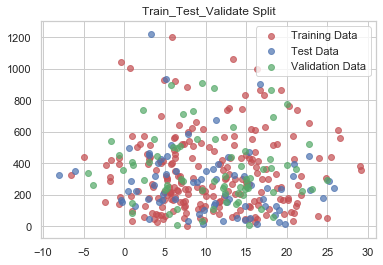

In [84]:
plt.scatter(x_train, y_train, label = "Training Data", color = "r", alpha =.7)
plt.scatter(x_test, y_test, label = "Test Data", color = "b", alpha =.7)
plt.scatter(x_validate, y_validate, label = "Validation Data", color = "g", alpha =.7)
plt.legend()
plt.title("Train_Test_Validate Split")
plt.show()

In [85]:
#Create linear model and train it 
lr = LinearRegression()
lr.fit(x_train.values.reshape(-1, 1), y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

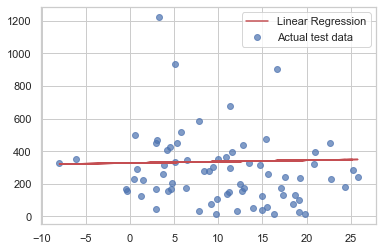

In [86]:
# Use model to predict on test data
prediction = lr.predict(x_test.values.reshape(-1, 1))

# Plot prediction line against actual test data 
plt.plot(x_test, prediction, label='Linear Regression', color = 'r')
plt.scatter(x_test, y_test, label='Actual test data', color = 'b', alpha=.7)
plt.legend()
plt.show()

The best score that we could achieve for a model is 1.0. 
~Soo our linear model is not that great...

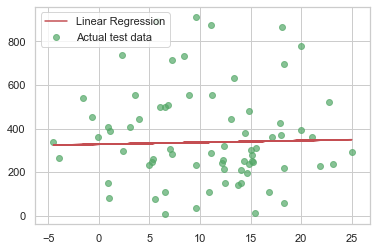

In [87]:
# Plot prediction line against actual test data 
prediction = lr.predict(x_validate.values.reshape(-1, 1))
plt.plot(x_validate, prediction, label='Linear Regression', color = 'r')
plt.scatter(x_validate, y_validate, label='Actual test data', color = 'g', alpha=.7)
plt.legend()
plt.show()

In [88]:
# Score the model 
lr.score(x_validate.values.reshape(-1, 1), y_validate.values)

-0.015111797629561385

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [90]:
y_true = y_validate
y_pred = lr.predict(x_validate.values.reshape((-1,1)))

In [91]:
print("Mean Squared Error:",mean_squared_error(y_pred, y_true))
print("Root Mean Squared Error:",mean_squared_error(y_pred, y_true)**0.5)
print("Coefficient of determination:",r2_score(y_pred, y_true))

Mean Squared Error: 48466.59032108573
Root Mean Squared Error: 220.1512896194018
Coefficient of determination: -1456.5256532493388


### Polynomial  regression

In [92]:
from sklearn.preprocessing import PolynomialFeatures


In [93]:
def plot_regression_poly(X,Y,d):
    
    # initialize PolynomialFeatures
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X.reshape(-1,1))
    lin_reg_Poly = LinearRegression()
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data (we have to transform the inputs as well!)
    x_fit = np.arange(X.min(),X.max() ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.figure(figsize = (8,6))
    plt.scatter(X,Y,marker="o", c='C2')
    ylim = plt.ylim()
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Demand (Min)")
    plt.xlim([X.min()-2,X.max()+2]) # leave some space before and after limits
    plt.ylim(ylim)
    print ('The R^2 for quadratic curve is: ',r2_score(Y, model_pred))
    print(lin_reg_Poly.coef_) 

The R^2 for quadratic curve is:  0.003027769020014226
[ 0.00000000e+00 -5.83438791e+00  9.16646827e-01 -4.71354077e-02
  8.52020904e-04]


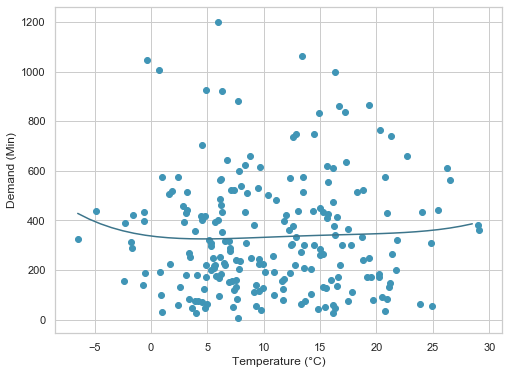

In [94]:
xp = x_train.values

yp = y_train 

plot_regression_poly(X = xp, Y = yp, d = 4)

The R^2 for quadratic curve is:  0.0569547494376027
[ 0.00000000e+00  8.53198623e+01 -1.55110324e+01  1.00562512e+00
 -2.13883197e-02]


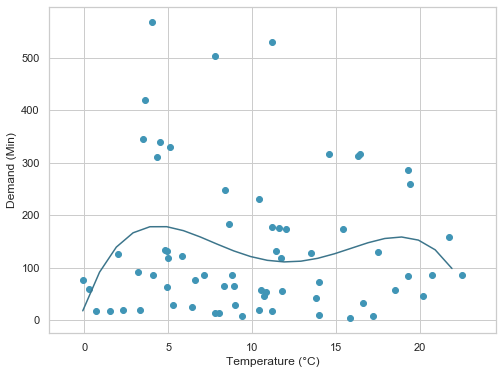

In [46]:
xp = x_test.values

yp = y_test 

plot_regression_poly(X = xp, Y = yp, d = 4)

The R^2 for quadratic curve is:  0.11425680745187916
[ 0.00000000e+00 -9.50713765e+01  1.79648825e+01 -1.22782337e+00
  2.81976648e-02]


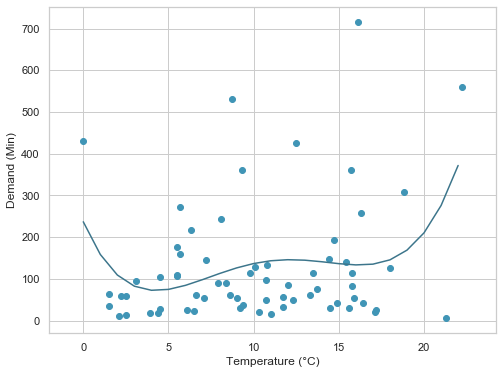

In [47]:
xp = x_validate.values

yp = y_validate 

plot_regression_poly(X = xp, Y = yp, d = 4)

In [95]:
plot_regression_poly

<function __main__.plot_regression_poly(X, Y, d)>

### Idea

Split dataset into train_test_validate sets not for every hour individually but rather hourly.